In [1]:
import joblib
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import scale

In [4]:
# Load the joblib files
x = joblib.load('X.joblib')
data_loc_y = joblib.load('data_loc_Y.joblib')
data_har_y = joblib.load('data_har_Y.joblib')
phase = joblib.load('PHASE.joblib')

In [5]:
x.shape, data_loc_y.shape, data_har_y.shape, phase.shape

((240, 52, 990), (240,), (240,), (240, 52, 990))

In [6]:
data_loc_y[:]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  9

In [7]:
data_har_y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [8]:
# Transpose x to shape (240, 990, 52)
x_transposed = x.transpose(0, 2, 1)/10.0
phase_transposed = phase.transpose(0, 2, 1)
x_transposed.shape, phase_transposed.shape

((240, 990, 52), (240, 990, 52))

In [9]:
def lowPassFilter(inputSignalArray):
    filteredOutput = np.zeros(inputSignalArray.shape[0])
    filteredOutput[0] = inputSignalArray[0]
    #print(filteredOutput)
    for i in range(1, inputSignalArray.shape[0]):
        newVal = 0.97*filteredOutput[i-1] + .03*inputSignalArray[i]
        filteredOutput[i] = newVal
    return filteredOutput

In [10]:
csi_magnitude_filtered = np.apply_along_axis(lowPassFilter, 1, x_transposed)

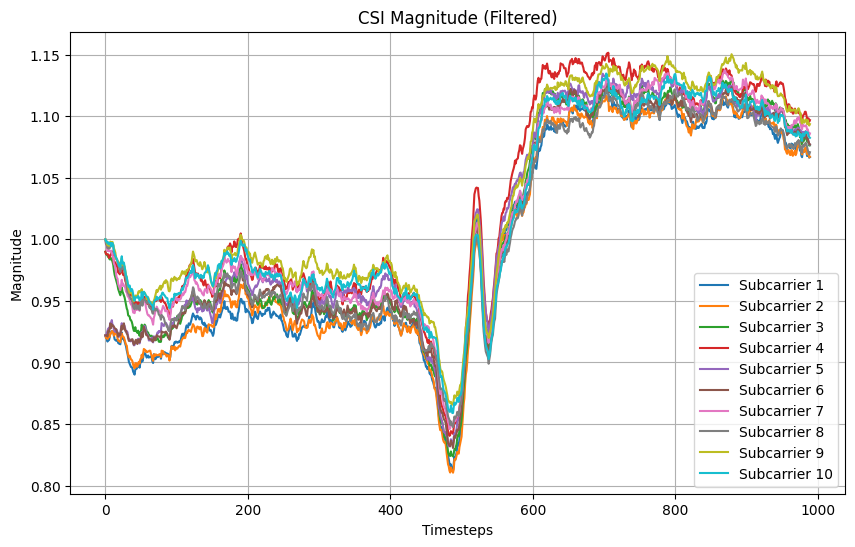

In [11]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = csi_magnitude_filtered[0, :, :10]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# prompt: unwrap each of the Phase data.

# Unwrap the phase data for each sample and subcarrier
phase_unwrapped = np.unwrap(phase_transposed, axis=1)

phase_unwrapped.shape


(240, 990, 52)

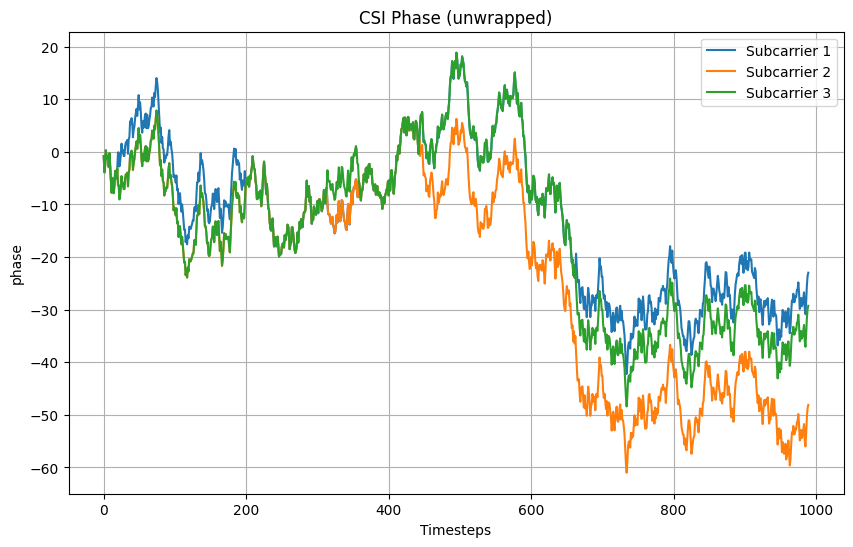

In [13]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = phase_unwrapped[0, :, :3]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('phase')
plt.title('CSI Phase (unwrapped)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
phase_unwrapped.shape, csi_magnitude_filtered.shape

((240, 990, 52), (240, 990, 52))

In [16]:
# Calculate variance across the samples (axis=0) for each subcarrier
variance_data1 = np.var(phase_unwrapped, axis=(0, 1))  # Shape will be (52,)
variance_data2 = np.var(csi_magnitude_filtered, axis=(0, 1))  # Shape will be (52,)

# Sort the variances and get the sorted indices
sorted_indices_data1 = np.argsort(variance_data1)
sorted_indices_data2 = np.argsort(variance_data2)

# Print the sorted indices
print("Sorted indices for subcarriers in data1 based on variance:", sorted_indices_data1)
print("Sorted indices for subcarriers in data2 based on variance:", sorted_indices_data2)

Sorted indices for subcarriers in data1 based on variance: [22 29 24 15  7 44  6 17 28 30 36 40 51 26  0 21 19 32 37 31 11 16 34 43
 49 50 38 41 46 14 47 25 27 42 12 20 13 48 39 23 33 45 18 10  8 35  1  4
  5  9  2  3]
Sorted indices for subcarriers in data2 based on variance: [50 51 42 48 49 47 46 38 34 40 32 43 36 44 37 41 39 45 33 31 30 35 28 29
 27 26 24 25 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4
  2  3  1  0]


In [ ]:
# 3 subcarrier
#csi_amp_3 = np.array(x_transposed)[:, :,[34, 50, 38]]
csi_phase_3 = np.array(phase_transposed)[:,:,[34, 50, 38]]

In [18]:
phase_transposed.shape

(240, 990, 52)

In [288]:
combined = np.concatenate((csi_magnitude_filtered[:,:,:30], phase_unwrapped[:,:,:30]), axis=-1)#csi_magnitude_filtered[:, :, :6]#np.concatenate((csi_amp_3, csi_phase_3), axis=-1)27, 26, 24, 25, 23, 22 ]

In [289]:
combined.shape

(240, 990, 60)

In [290]:
for i in range(combined.shape[0]):
  combined[i] = scale(combined[i])

In [291]:
combined.shape

(240, 990, 60)

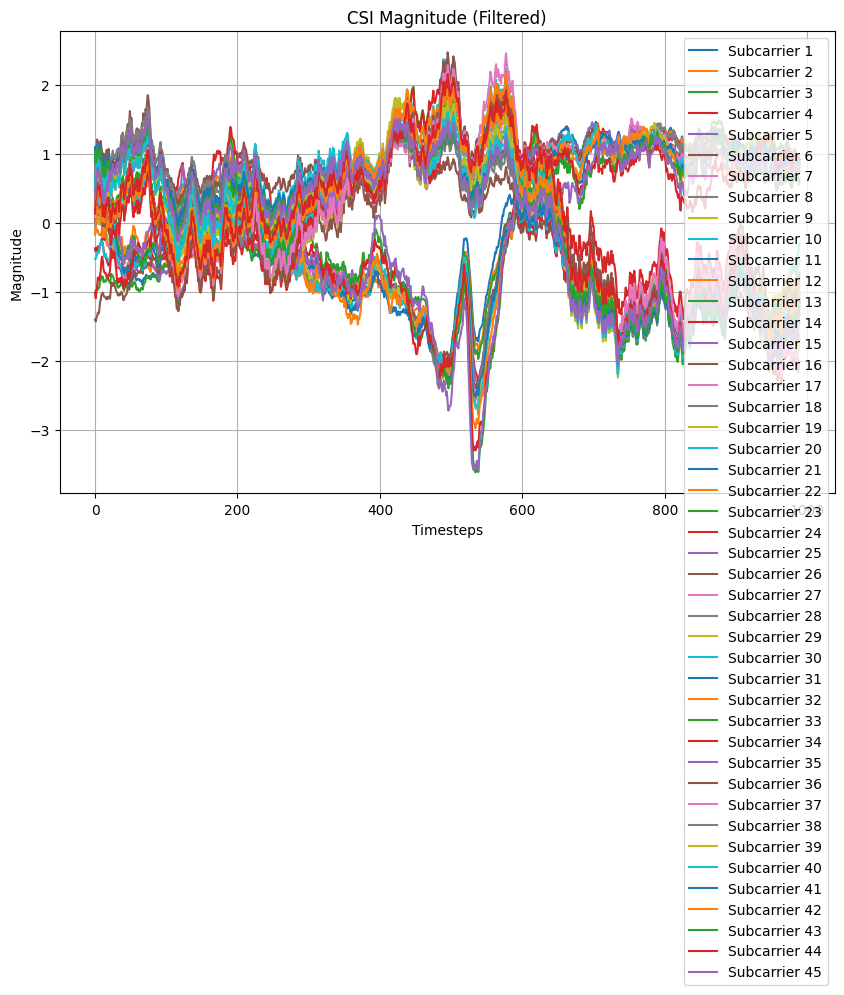

In [292]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = combined[0, :, 15:]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
plt.legend()
plt.grid(True)
plt.show()


In [293]:
np.shape(combined)

(240, 990, 60)

In [294]:
np.array(data_har_y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [295]:
# Assuming data_har_y is the same as the provided array in the prompt

unique_labels, counts = np.unique(data_har_y, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [60 60 60 60]


In [296]:
labels = np.array(data_har_y)

In [297]:
np.max(combined)

7.491058200212971

In [298]:
from sklearn.model_selection import train_test_split

# Assume `X` is your feature set and `y` is the corresponding labels
x_trn, X_T, y_trn, Y_T = train_test_split(
    combined, labels, test_size=0.4, stratify=labels, random_state=902)

print("Shape of x_trn:", x_trn.shape)
print("Shape of y_trn:", y_trn.shape)
print("Shape of X_T:", X_T.shape)
print("Shape of Y_T:", Y_T.shape)

Shape of x_trn: (144, 990, 60)
Shape of y_trn: (144,)
Shape of X_T: (96, 990, 60)
Shape of Y_T: (96,)


In [299]:
import numpy as np

def deterministic_mixup(data, labels, k=5):
    augmented_data = []
    augmented_labels = []

    unique_classes = np.unique(labels)
    for cls in unique_classes:
        cls_indices = np.where(labels == cls)[0]
        cls_data = data[cls_indices]
        cls_labels = labels[cls_indices]

        for i in range(len(cls_data)):
            for _ in range(k):
                factor = random.uniform(0.7, 0.8)
                j = np.random.choice([idx for idx in range(len(cls_data)) if idx != i])
                mixed_data = factor * cls_data[i] + (1.0 - factor) * cls_data[j]
                mixed_label = cls_labels[i]  # Since both samples belong to the same class

                augmented_data.append(mixed_data)
                augmented_labels.append(mixed_label)

    return np.array(augmented_data), np.array(augmented_labels)

#train_data = np.random.rand(150, 990, 52)
#train_labels = np.random.randint(0, 10, 150)

k = 10  # Number of augmented samples to generate per original sample
x_train, y_train = deterministic_mixup(x_trn, y_trn, k)

print(x_train.shape)
print(y_train.shape)

(1440, 990, 60)
(1440,)


In [300]:
import tensorflow as tf
n_split = 25
x_train = tf.constant(x_train)
x_val = tf.constant(X_T[:n_split])
x_test = tf.constant(X_T[n_split:])

y_train = tf.constant(y_train)
y_val = tf.constant(Y_T[:n_split])
y_test = tf.constant(Y_T[n_split:])

In [301]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1440, 990, 60)
x_val shape: (25, 990, 60)
x_test shape: (71, 990, 60)
y_train shape: (1440,)
y_val shape: (25,)
y_test shape: (71,)


In [253]:
temp = list(zip(combined, labels))
random.shuffle(temp)
combined, labels = zip(*temp)
combined, labels = list(combined), list(labels)

In [254]:
from sklearn.utils import shuffle
import tensorflow as tf

# Shuffle the data and labels together
combined_shuffled, labels_shuffled = shuffle(combined, labels, random_state=410)

# Split the data and labels
x_train = tf.constant(combined_shuffled[:150])
x_val = tf.constant(combined_shuffled[150:170])
x_test = tf.constant(combined_shuffled[170:240])

y_train = tf.constant(labels_shuffled[:150])
y_val = tf.constant(labels_shuffled[150:170])
y_test = tf.constant(labels_shuffled[170:240])

In [302]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1440, 990, 60)
x_val shape: (25, 990, 60)
x_test shape: (71, 990, 60)
y_train shape: (1440,)
y_val shape: (25,)
y_test shape: (71,)


## Reshaping 1d to 2d data

In [303]:
# Reshape the data to add an extra dimension for the CNN
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (num_samples, 200, 6, 1)
x_val = np.expand_dims(x_val, axis=-1)      # Shape: (num_samples, 200, 6, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (num_samples, 200, 6, 1)

In [304]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1440, 990, 60, 1)
x_val shape: (25, 990, 60, 1)
x_test shape: (71, 990, 60, 1)
y_train shape: (1440,)
y_val shape: (25,)
y_test shape: (71,)


In [305]:
(y_test)

<tf.Tensor: shape=(71,), dtype=int32, numpy=
array([0, 1, 0, 1, 0, 3, 0, 3, 3, 2, 1, 3, 0, 0, 3, 0, 3, 0, 3, 2, 2, 1,
       0, 0, 0, 2, 2, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 0, 2, 3, 2, 1, 1, 1,
       3, 1, 0, 2, 0, 1, 2, 2, 2, 0, 3, 3, 2, 3, 0, 2, 3, 3, 3, 3, 1, 2,
       1, 3, 0, 2, 0], dtype=int32)>

In [306]:
np.shape(x_train)

(1440, 990, 60, 1)

In [307]:
np.shape(x_test)

(71, 990, 60, 1)

## Model

In [308]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Reshape,  GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization, UpSampling1D, Lambda, Conv2D,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers, regularizers, Input

In [309]:
from tensorflow.keras import layers, models, Input


# Input layer
inputs = Input(shape=(990, 60, 1))
#x = layers.BatchNormalization()(inputs)
# Convolutional Layer 1
x = layers.Conv2D(8, (5, 5), activation='relu', kernel_regularizer=l2(0.001))(inputs) #, padding='same'
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Convolutional Layer 2
x = layers.Conv2D(8, (5, 5), activation='relu', kernel_regularizer=l2(0.001))(x) #, padding='same'
x = layers.BatchNormalization()(x)
x_b_T = layers.AveragePooling2D(pool_size=(3, 3))(x)

#x = layers.Conv2D(8, (5, 5), activation='relu')(x) #, padding='same'
#x = layers.BatchNormalization()(x)
#x_b_T = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Dropout Layer
# Flatten the output to feed into fully connected layer
f = layers.Flatten()(x_b_T)
f = layers.Dropout(0.5)(f)

d1 = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(f)
d1 = layers.Dropout(0.5)(d1)
# Fully Connected Layer
outputs = layers.Dense(4, activation='sigmoid')(d1)  # Output layer with softmax activation for 276 classes


# Create the model
comsnet_model = models.Model(inputs=inputs, outputs=outputs)

comsnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
comsnet_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 990, 60, 1)]      0         
                                                                 
 conv2d_45 (Conv2D)          (None, 986, 56, 8)        208       
                                                                 
 batch_normalization_45 (Ba  (None, 986, 56, 8)        32        
 tchNormalization)                                               
                                                                 
 average_pooling2d_45 (Aver  (None, 328, 18, 8)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_46 (Conv2D)          (None, 324, 14, 8)        1608      
                                                                 
 batch_normalization_46 (Ba  (None, 324, 14, 8)        32 

In [171]:
from tensorflow.keras import layers, models, Input


# Input layer
inputs = Input(shape=(990, 20, 1))
    
# Convolutional Layer 1
x = layers.Conv2D(3, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    
# Convolutional Layer 2
x = layers.Conv2D(3, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x_b_T = layers.AveragePooling2D(pool_size=(2, 2))(x)
    
# Dropout Layer
# x = layers.Dropout(0.6)(x_b_T)

# # Flatten the output to feed into fully connected layer
# x = layers.Flatten()(x)

f = layers.Flatten()(x_b_T)
f = layers.Dropout(0.4)(f)

d1 = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(f)
d1 = layers.Dropout(0.4)(d1)
    
# Fully Connected Layer
outputs = layers.Dense(4, activation='softmax')(d1)  # Output layer with softmax activation for 4 classes
    
# Create the model
signfi_model = models.Model(inputs=inputs, outputs=outputs)

signfi_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
signfi_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 990, 20, 1)]      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 990, 20, 3)        30        
                                                                 
 batch_normalization_29 (Ba  (None, 990, 20, 3)        12        
 tchNormalization)                                               
                                                                 
 average_pooling2d_29 (Aver  (None, 495, 10, 3)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_30 (Conv2D)          (None, 495, 10, 3)        84        
                                                                 
 batch_normalization_30 (Ba  (None, 495, 10, 3)        12 

In [310]:
# Define the early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Train the model
history = comsnet_model.fit(
    np.array(x_train), np.array(y_train),
    validation_data=(x_val, y_val),
    epochs=2000,
    batch_size=64,
    callbacks=[callback]
)

Epoch 1/2000
23/23 [==============================] - 9s 355ms/step - loss: 1.1585 - accuracy: 0.7111 - val_loss: 1.3411 - val_accuracy: 0.6400
Epoch 2/2000
23/23 [==============================] - 8s 345ms/step - loss: 0.5187 - accuracy: 0.9035 - val_loss: 1.1867 - val_accuracy: 0.7200
Epoch 3/2000
23/23 [==============================] - 8s 347ms/step - loss: 0.4140 - accuracy: 0.9493 - val_loss: 1.1021 - val_accuracy: 0.6800
Epoch 4/2000
23/23 [==============================] - 8s 341ms/step - loss: 0.3743 - accuracy: 0.9667 - val_loss: 0.9767 - val_accuracy: 0.7600
Epoch 5/2000
23/23 [==============================] - 8s 342ms/step - loss: 0.3448 - accuracy: 0.9757 - val_loss: 0.9189 - val_accuracy: 0.7200
Epoch 6/2000
23/23 [==============================] - 8s 344ms/step - loss: 0.3183 - accuracy: 0.9799 - val_loss: 0.9331 - val_accuracy: 0.7200
Epoch 7/2000
23/23 [==============================] - 8s 351ms/step - loss: 0.2936 - accuracy: 0.9917 - val_loss: 0.8337 - val_accuracy:

In [311]:
comsnet_model.evaluate(np.array(x_test), np.array(y_test))

3/3 [==============================] - 0s 33ms/step - loss: 0.8687 - accuracy: 0.8028


[0.8686518669128418, 0.8028169274330139]